In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns
sns.set_theme()

In [263]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [264]:
def log_mod(x):
    return np.log(abs(x))

In [265]:
spx_price_day = pd.read_csv('data/SPX-Price-Daily.csv')
spx_price_minute = pd.read_csv('SPX_minute_2011_05_02-2022-02-18.csv')
spx_price_minute = spx_price_minute.drop(['ticker.1', 'trade_date.1'], axis = 1)

In [266]:
spx_gamma = pd.read_csv('data/spx-gamma-dix.csv')

In [267]:
# daily SPX Gamma distribution

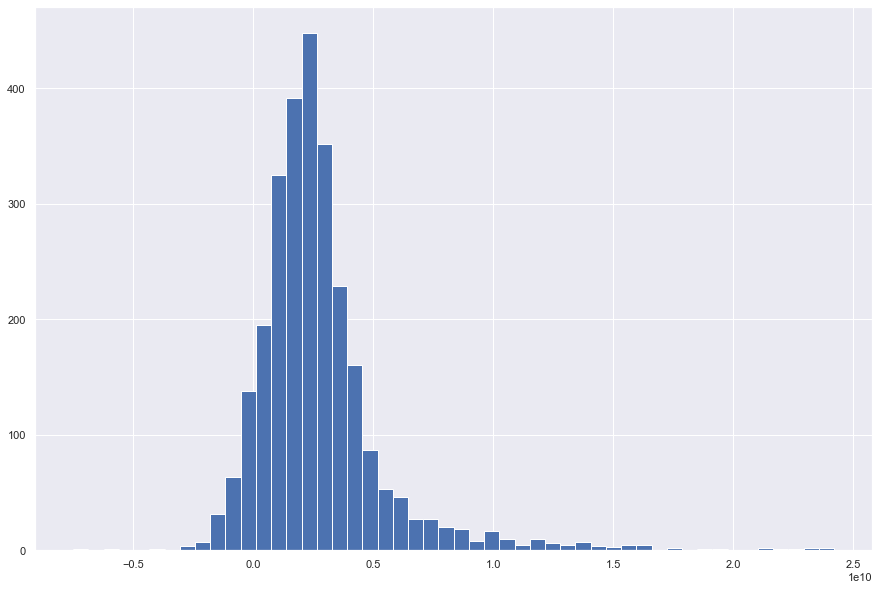

In [268]:
plt.hist(combined_day['gex'], bins = 50);

In [269]:
# SPX Gamma exposure over time

<AxesSubplot:xlabel='date'>

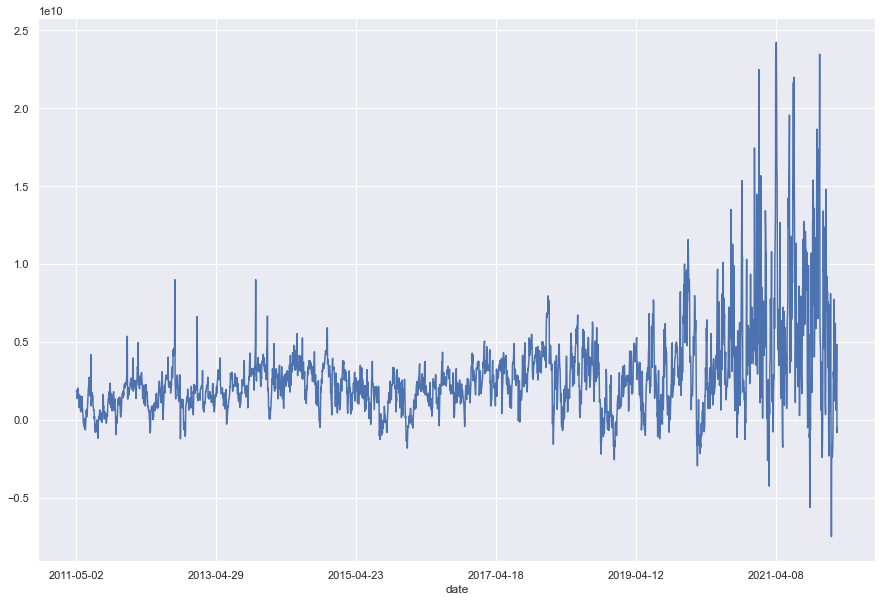

In [270]:
spx_gamma.set_index('date')['gex'].plot()

In [271]:
spx_price_day.rename(columns={'pricing_date':'date'}, inplace=True)
spx_price_day.head()

,Unnamed: 0,trading_item_id,date,open,high,low,mid,close,bid,ask,volume,adjustment_factor,split_adjustment_factor,dividend_adjustment,vwap
0,0,6179710,2011-05-02,111.335451,111.424799,110.425729,110.649098,110.645037,110.645037,110.653159,126310033.0,NaN,1.0,0.812253,110.864345
1,1,6179710,2011-05-03,110.433851,110.620669,109.690640,110.242972,110.247033,110.238910,110.247033,138445808.0,NaN,1.0,0.812253,110.133318
2,2,6179710,2011-05-04,110.198298,110.247033,109.028654,109.520067,109.516006,109.516006,109.524128,182821163.0,NaN,1.0,0.812253,109.637844
3,3,6179710,2011-05-05,108.906816,109.613476,108.045829,108.545364,108.525058,108.541303,108.549425,227065699.0,NaN,1.0,0.812253,109.028654
4,4,6179710,2011-05-06,109.605353,110.165808,108.208279,108.983980,109.004287,108.979919,108.988042,222951264.0,NaN,1.0,0.812253,109.645966


In [272]:
spx_price_minute.rename(columns={'trade_date':'date'}, inplace=True)
spx_price_minute.head()

,ticker,date,open_bar_time,open_bid_price,open_bid_size,open_ask_price,open_ask_size,first_trade_time,first_trade_price,first_trade_size,...,downtick_volume,repeat_uptick_volume,repeat_downtick_volume,unknown_tick_volume,trade_to_mid_vol_weight,trade_to_mid_vol_weight_relative,time_weight_bid,time_weight_ask,price_adjustment_factor,volume_adjustment_factor
0,SPY,2011-05-02,2011-05-02T13:30:00+00:00,111.3266,89500.0,111.3347,3600.0,2011-05-02T13:30:00.030000+00:00,111.3347,200.0,...,151435.0,705600.0,793798.0,0.0,0.2204,0.2208,111.2535,111.2616,0.8122,1.0
1,SPY,2011-05-02,2011-05-02T13:31:00+00:00,111.2535,7800.0,111.2616,133200.0,2011-05-02T13:31:00.024000+00:00,111.2616,100.0,...,55039.0,343081.0,283638.0,0.0,0.0641,0.0641,111.2779,111.2860,0.8122,1.0
2,SPY,2011-05-02,2011-05-02T13:32:00+00:00,111.2779,64600.0,111.2860,24700.0,2011-05-02T13:32:00.041000+00:00,111.2819,200.0,...,60555.0,273533.0,331752.0,0.0,0.1828,0.1783,111.2941,111.3023,0.8122,1.0
3,SPY,2011-05-02,2011-05-02T13:33:00+00:00,111.2941,56900.0,111.3023,17300.0,2011-05-02T13:33:00.091000+00:00,111.3023,100.0,...,25502.0,147387.0,245927.0,0.0,0.0223,0.0223,111.2779,111.2860,0.8122,1.0
4,SPY,2011-05-02,2011-05-02T13:34:00+00:00,111.2779,14600.0,111.2860,62000.0,2011-05-02T13:34:00.240000+00:00,111.2779,100.0,...,27544.0,473564.0,157681.0,0.0,0.0888,0.0862,111.2616,111.2698,0.8122,1.0


In [273]:
combined_day = pd.merge(spx_gamma,spx_price_day,on='date',how='inner')
combined_day['gex_scaled'] = pd.Series(combined_day['gex']/1e9).apply(lambda x: log_mod(x))
combined_day['volume_scaled'] = pd.Series(combined_day['volume']/1e6).apply(lambda x: log_mod(x)) - 2

In [274]:
daily_liquidity = []
for i in range(len(combined_day)):
    if combined_day.iloc[i]['high'] == combined_day.iloc[i]['low']:
        daily_liquidity.append(combined_day.iloc[i]['volume_scaled']/abs(combined_day.iloc[i]['high'] - combined_day.iloc[i]['vwap']))
    else:
        daily_liquidity.append(combined_day.iloc[i]['volume_scaled']/abs(combined_day.iloc[i]['high'] - combined_day.iloc[i]['low']))

combined_day['liquidity'] = pd.Series(daily_liquidity) 

In [275]:
# daily liquidity

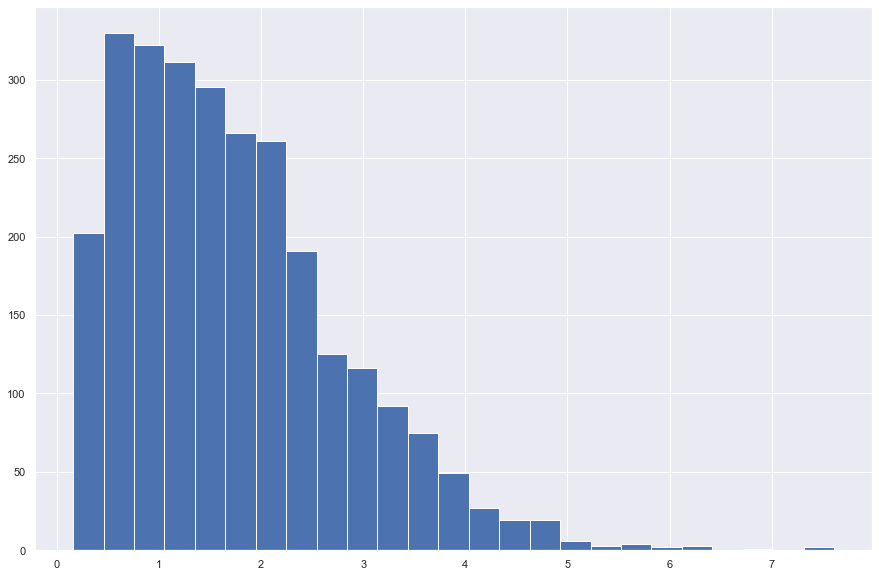

In [276]:
plt.hist(combined_day['liquidity'], bins = 25);

In [277]:
# daily log(volume)

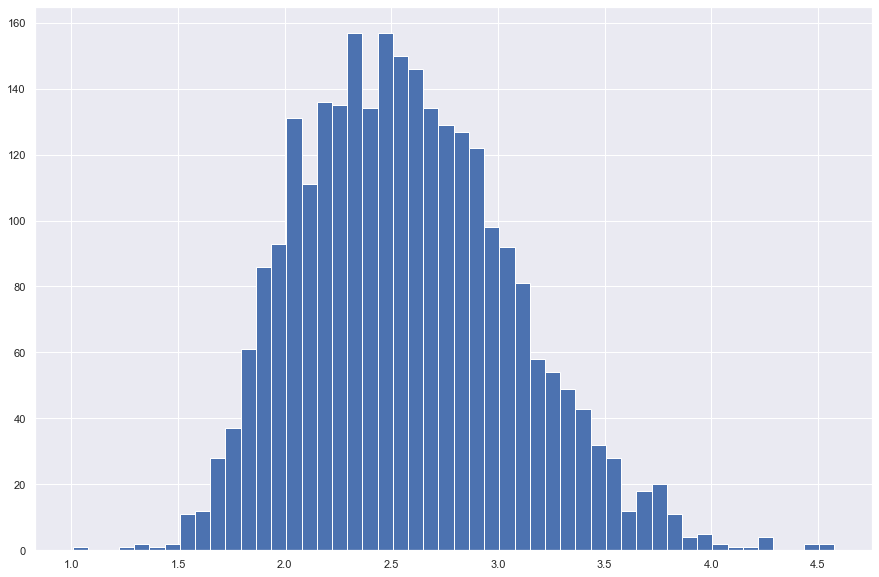

In [278]:
plt.hist(combined_day['volume_scaled'], bins = 50);

In [279]:
combined_minute =  pd.merge(spx_gamma,spx_price_minute,on='date',how='inner')
combined_minute['gex_scaled'] = pd.Series(combined_minute['gex']/1e9).apply(lambda x: log_mod(x))
combined_minute['volume'] = combined_minute['volume'].replace(0,np.mean(combined_minute['volume']))
combined_minute['volume_scaled'] = pd.Series(combined_minute['volume']/1e4).apply(lambda x: log_mod(x))

In [280]:
from IPython.display import clear_output

In [281]:
combined_minute['high'] = (combined_minute['high_bid_price'] + combined_minute['high_ask_price'])/2
combined_minute['low'] = (combined_minute['low_bid_price'] + combined_minute['low_ask_price'])/2
combined_minute['liquidity'] = combined_minute['volume_scaled']/abs(combined_minute['high'] - combined_minute['low'])/10
combined_minute['liquidity'] = combined_minute['liquidity'].replace(np.inf, np.mean(combined_minute['liquidity'])).replace(-np.inf, np.mean(combined_minute['liquidity']))
combined_minute['log_liquidity'] = combined_minute['liquidity'].apply(lambda x: log_mod(x))

(0.0, 25.0)

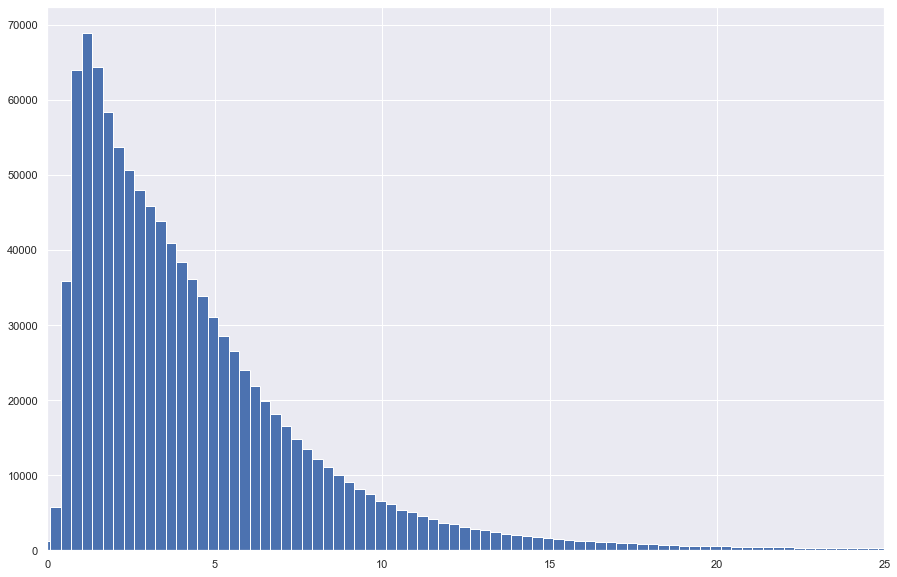

In [282]:
plt.hist(combined_minute['liquidity'], bins = 1000);
plt.xlim(0, 25)

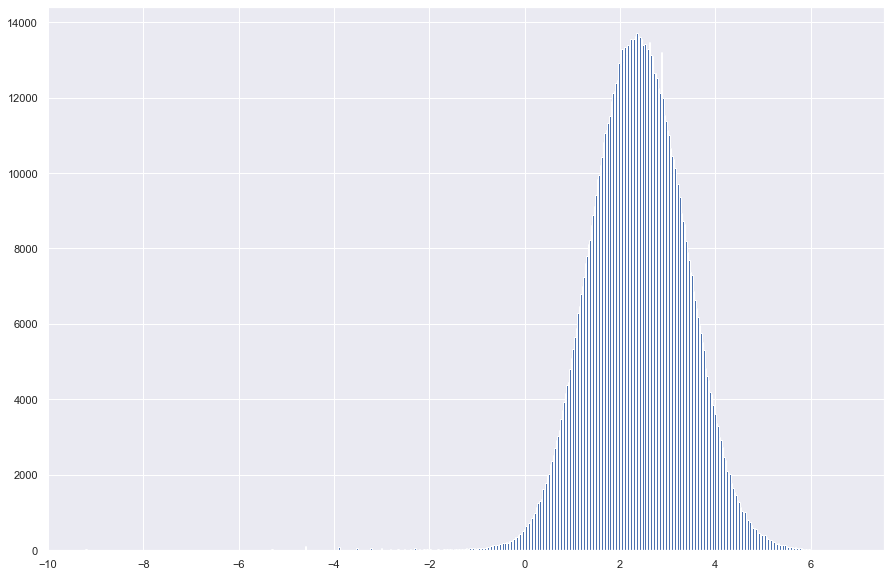

In [283]:
plt.hist(combined_minute['volume_scaled'], bins = 500);

In [284]:
date_group = combined_minute.groupby('date').mean()[['gex', 'liquidity', 'gex_scaled', 'log_liquidity','high', 'low']]

In [285]:
date_group['std_liquidity'] = [x for x in pd.Series(combined_minute.groupby('date').std()['liquidity'].to_list())]
date_group['std_log_liquidity'] = [x for x in pd.Series(combined_minute.groupby('date').std()['log_liquidity'].to_list())]

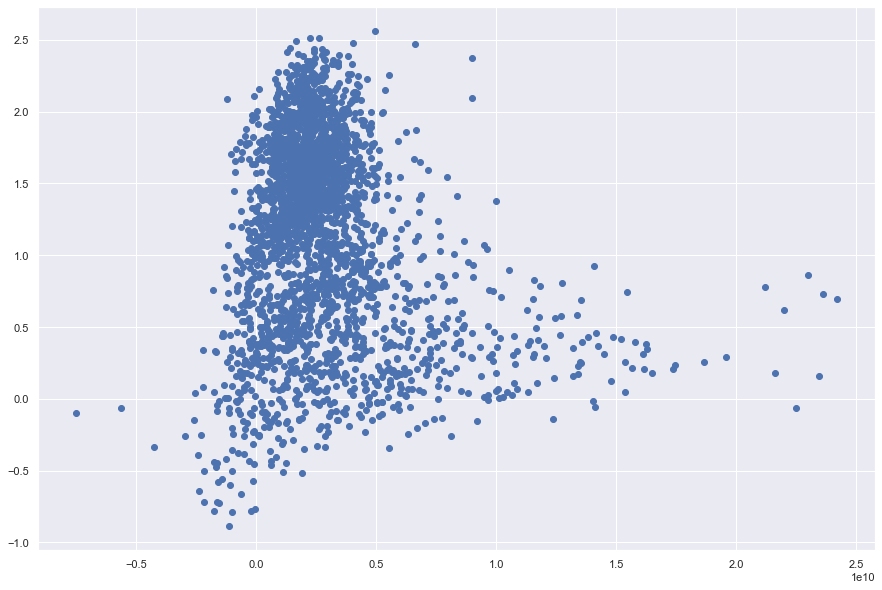

In [286]:
plt.scatter(date_group['gex'], date_group['log_liquidity'])

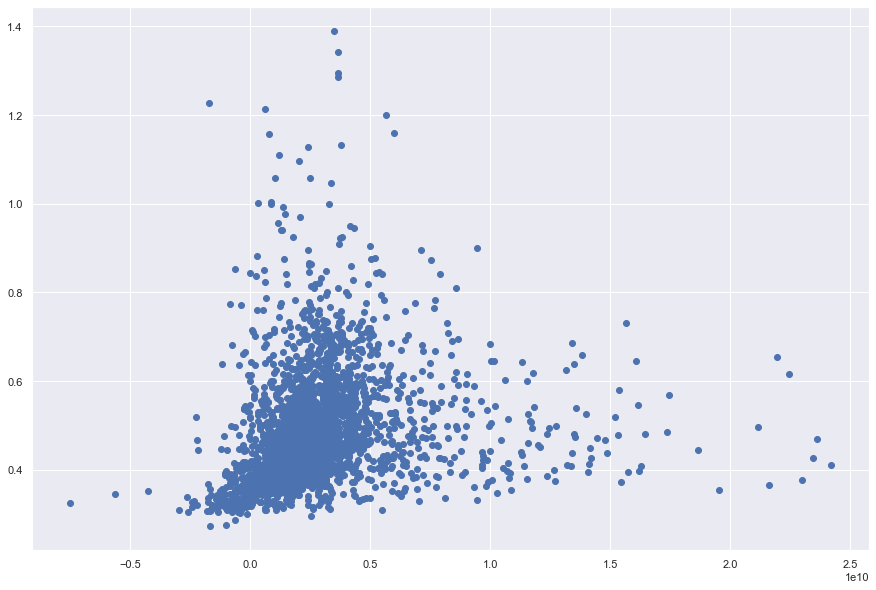

In [287]:
plt.scatter(date_group['gex'], date_group['std_log_liquidity'])

In [288]:
date_group.index = pd.to_datetime(date_group.index)
pre_covid = date_group[date_group.index < '2020-03-01']
post_covid = date_group[date_group.index > '2020-03-01']

Text(0.5, 1.0, 'Pre Covid SPX Gamma Vs Average Intraday Liquidity')

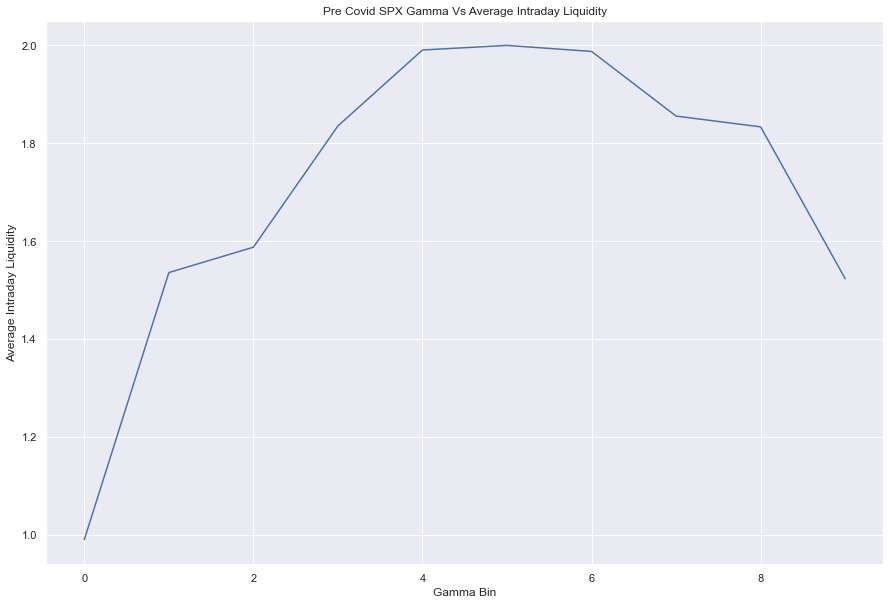

In [317]:
plt.plot(pre_covid.groupby(pd.qcut(pre_covid['gex'],10)).mean()[['liquidity']]/3)
plt.xlabel("Gamma Bin")
plt.ylabel("Average Intraday Liquidity")
plt.title('Pre Covid SPX Gamma Vs Average Intraday Liquidity')

Text(0.5, 1.0, 'Post Covid SPX Gamma Vs Average Intraday Liquidity')

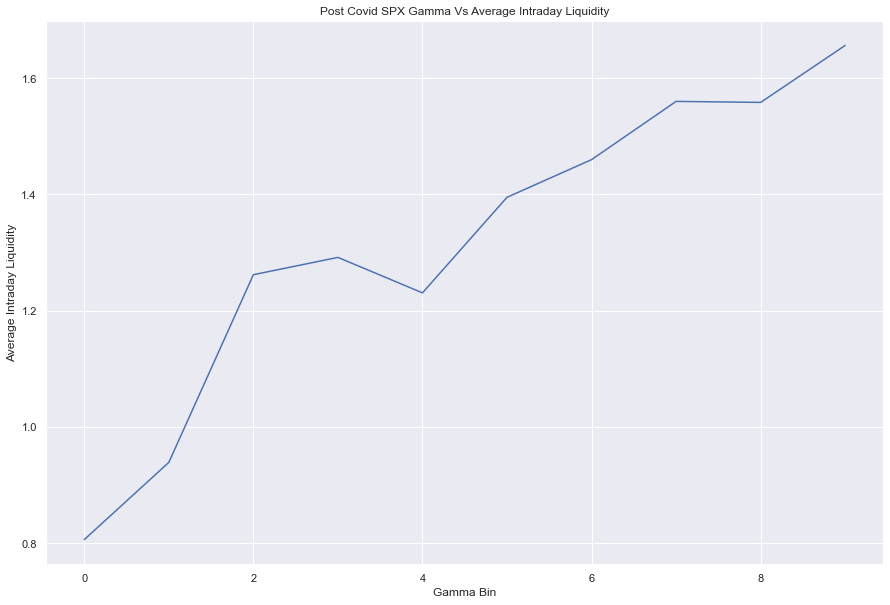

In [311]:
plt.plot(post_covid.groupby(pd.qcut(post_covid['gex'],10)).mean()[['liquidity']])
plt.xlabel("Gamma Bin")
plt.ylabel("Average Intraday Liquidity")
plt.title('Post Covid SPX Gamma Vs Average Intraday Liquidity')